## Plot feature distribution over time

In [11]:
import pandas as pd

races_df = pd.read_csv("../data/races.csv")

races_df

,Unnamed: 0,date_time,race_id,n_runners,place_num,number,current_odds,current_place_odds,place,relevance,...,TrainerDistancePercentageBeaten,TrainerSurfacePercentageBeaten,TrainerTrackPercentageBeaten,TrainerClassPercentageBeaten,DistanceDifference,RaceClassDifference,HasJockeyChanged,JockeyWeight,WeightAllowanceExtractor,MaxPastRatingExtractor
0,0,2016-05-31 15:00:00,1911274,12,3,1,21.0,5.0,7,25,...,0.547072,0.544847,0.658963,0.546834,NaN,NaN,NaN,59.4,0.0,NaN
1,1,2016-05-31 15:00:00,1911274,12,3,2,21.0,5.0,4,27,...,0.609576,0.770176,0.555556,0.888889,NaN,NaN,NaN,59.4,0.0,NaN
2,2,2016-05-31 15:00:00,1911274,12,3,3,67.0,14.2,8,24,...,0.573688,0.665286,0.585017,0.487727,NaN,NaN,NaN,59.4,0.0,NaN
3,3,2016-05-31 15:00:00,1911274,12,3,5,3.0,1.4,3,27,...,0.610190,0.589669,0.758305,0.510329,0.0,0.0,0.0,59.4,0.0,NaN
4,4,2016-05-31 15:00:00,1911274,12,3,6,101.0,21.0,11,14,...,0.571429,0.335559,NaN,0.446297,NaN,NaN,NaN,59.4,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404736,404736,2020-12-30 19:40:00,3771203,11,3,8,5.5,1.9,10,2,...,0.580878,0.570826,0.690438,0.582530,33.0,1.0,1.0,58.5,0.0,NaN
404737,404737,2020-12-30 19:40:00,3771203,11,3,9,67.0,14.2,8,2,...,0.675334,0.263018,0.485049,0.527400,-298.0,2.0,0.0,58.5,0.0,NaN
404738,404738,2020-12-30 19:40:00,3771203,11,3,10,17.0,4.2,6,10,...,0.557136,0.551782,0.562137,0.584497,216.0,2.0,1.0,58.5,0.0,NaN
404739,404739,2020-12-30 19:40:00,3771203,11,3,11,19.0,4.6,9,2,...,0.491047,0.611288,0.503619,0.646249,-167.0,0.0,1.0,58.1,0.0,63.0


                 std
year-month          
2016-05     0.750121
2016-06     0.858390
2016-07     0.790848
2016-08     0.756730
2016-09     0.723991
2016-10     0.770840
2016-11     0.802672
2016-12     0.789249
2017-01     0.772218
2017-02     0.757323
2017-03     0.721115
2017-04     0.710942
2017-05     0.706941
2017-06     0.733190
2017-07     0.752514
2017-08     0.752997
2017-09     0.715354
2017-10     0.707890
2017-11     0.707436
2017-12     0.715555
2018-01     0.724791
2018-02     0.667400
2018-03     0.680914
2018-04     0.692691
2018-05     0.704491
2018-06     0.724329
2018-07     0.707968
2018-08     0.707507
2018-09     0.673850
2018-10     0.662628
2018-11     0.656014
2018-12     0.637257
2019-01     0.644188
2019-02     0.668063
2019-03     0.636859
2019-04     0.631567
2019-05     0.678034
2019-06     0.669255
2019-07     0.655723
2019-08     0.672883
2019-09     0.655190
2019-10     0.651266
2019-11     0.627105
2019-12     0.606866
2020-01     0.615648
2020-02     0

<AxesSubplot:xlabel='CurrentSpeedFigure', ylabel='year-month'>

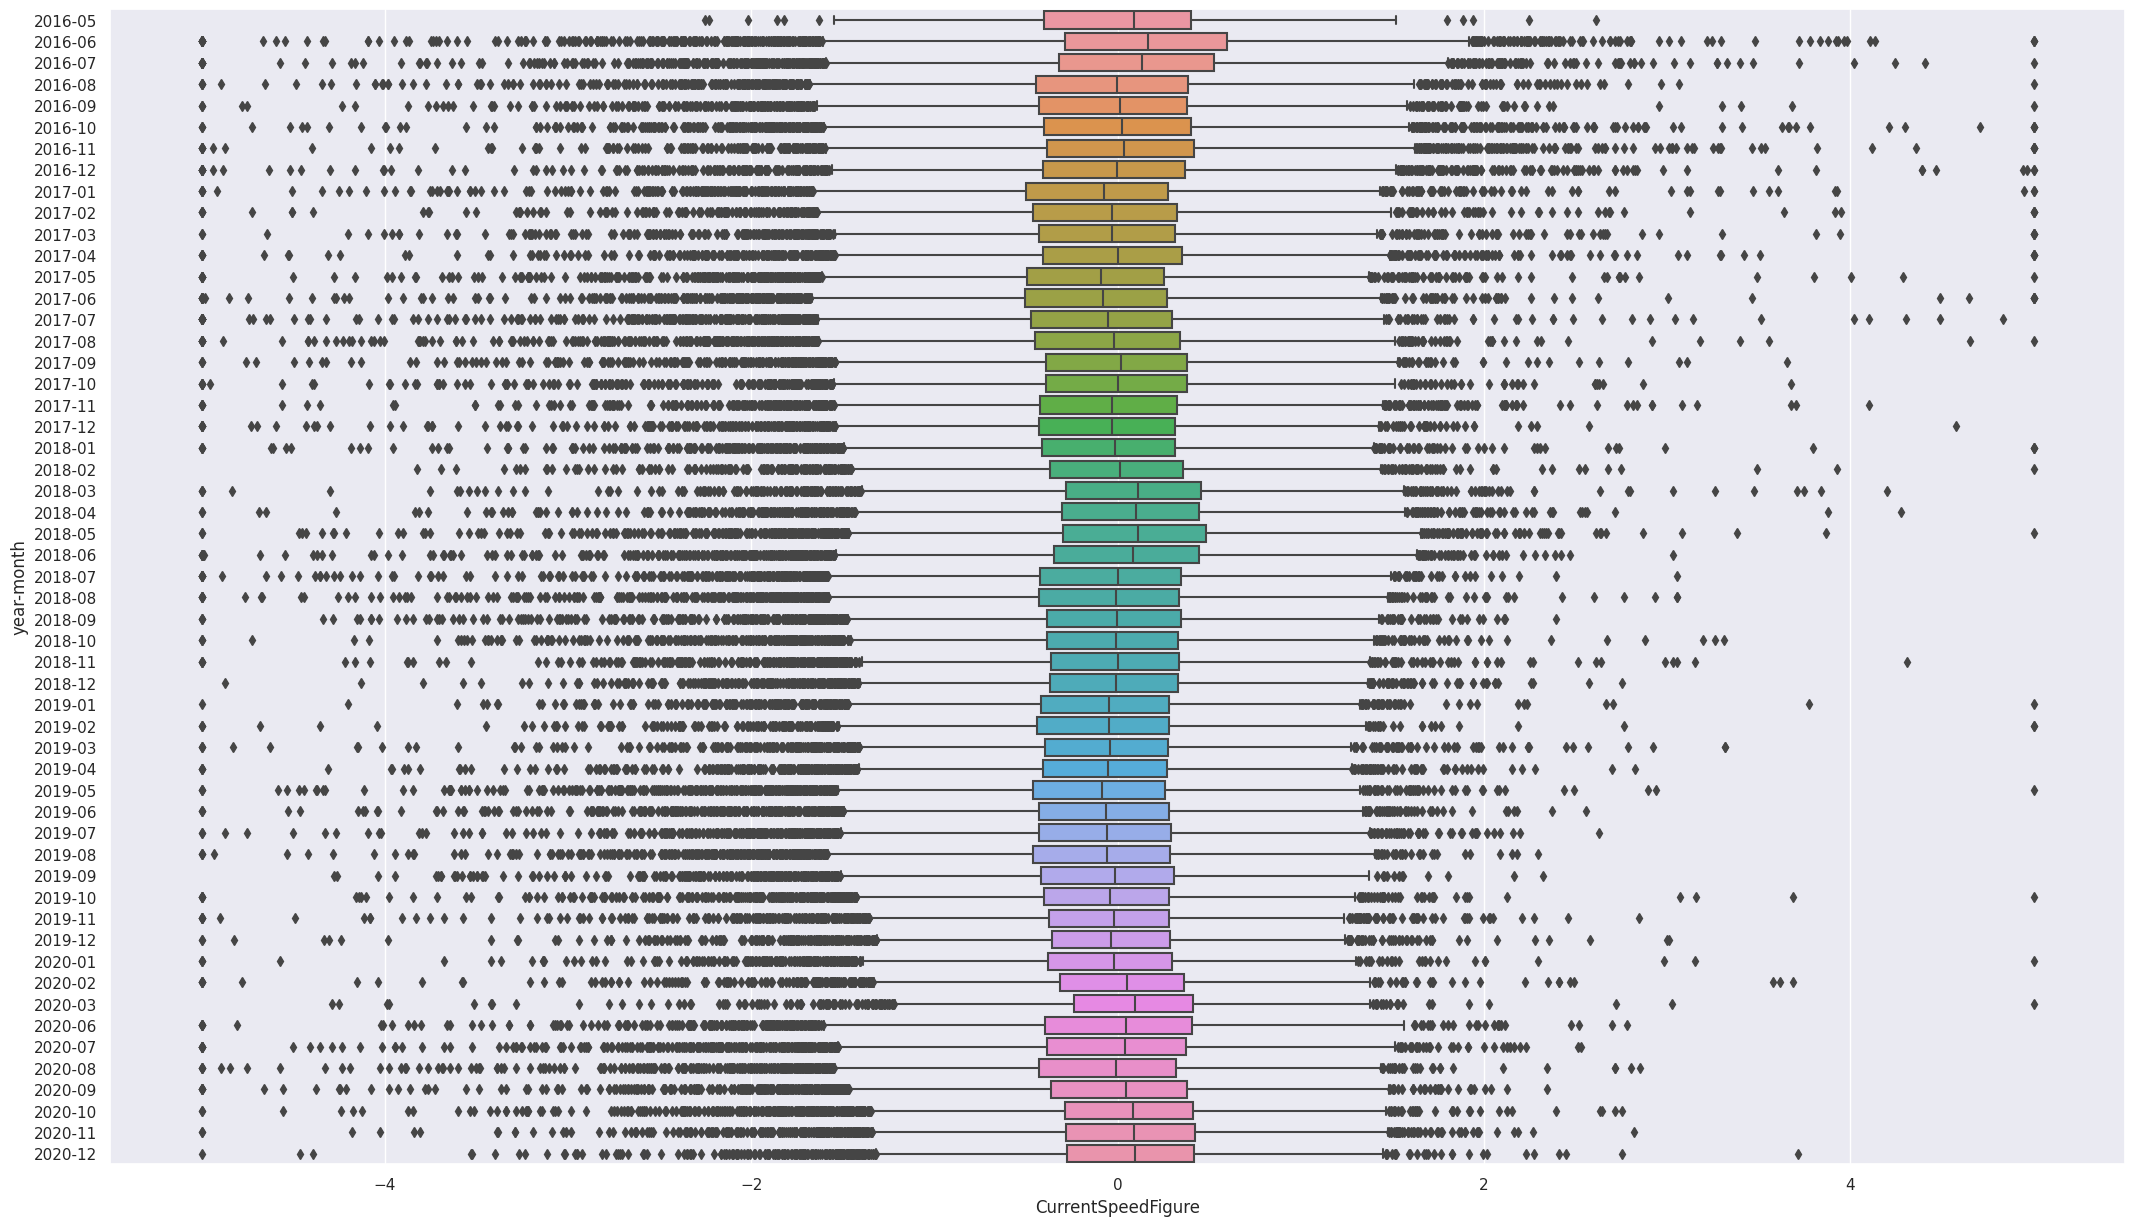

In [12]:
import seaborn as sns

COLUMN_NAME = "CurrentSpeedFigure"
TIME_INTERVAL = "year-month"

races_df["year-month"] = races_df["date_time"].astype(str).str[:7]
races_df["date"] = pd.to_datetime(races_df["date_time"], format='%Y-%m-%d')
races_df["dayofweek"] = races_df["date"].dt.dayofweek.astype(str)
races_df["hour"] = races_df["date"].dt.hour.astype(str)
races_df["minute"] = races_df["date"].dt.minute.astype(str)
races_df["month"] = races_df["date"].dt.month.astype(str)

print(races_df.groupby([TIME_INTERVAL]).agg(std=(COLUMN_NAME, "std")))

sns.set(rc={'figure.figsize':(26,15)})
sns.boxplot(data=races_df, x=COLUMN_NAME, y=TIME_INTERVAL)

In [9]:
from numpy.random import normal
from scipy.stats import stats
from numpy import std
from math import isnan
from statistics import mean

speed_figures = list(races_df["CurrentSpeedFigure"].values)
speed_figures = [speed_figure for speed_figure in speed_figures if not isnan(speed_figure)]
print(mean(speed_figures))
print(std(speed_figures))

speed_figures_sample = normal(loc=-12.8, scale=20.38, size=10000)
stats.percentileofscore(speed_figures_sample, -20)

-0.438400742796765
0.7159960418692674


/tmp/ipykernel_14323/3946010061.py:13: DeprecationWarning: Please use `percentileofscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.percentileofscore(speed_figures_sample, -20)


36.32

# Covariate Shift Detection

## 1.) Between a month and its predecessor

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

races_df = pd.read_csv("../data/races.csv")
races_df["year-month"] = races_df["date_time"].astype(str).str[:7]

month_df = races_df[races_df["year-month"].isin(["2022-09", "2022-08"])]
month_df["label"] = np.where(month_df["year-month"] == "2022-09", 1, 0)

month_df = month_df.fillna(value=-1)

month_df = month_df.drop(["date_time", "race_id", "horse_id", "year-month", "Month_Sin", "Month_Cos", "Unnamed: 0"], axis=1)

print(month_df)

features = [column for column in month_df.columns if column not in ["label"]]
shift_X = month_df.loc[:, features]
scaler = StandardScaler().fit(shift_X)
shift_X = scaler.transform(shift_X)

shift_y = month_df.loc[:, "label"]

X_train, X_test, y_train, y_test = train_test_split(shift_X, shift_y, test_size=0.33, random_state=42, stratify=shift_y)

log_regression_classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f"Classifier score:{log_regression_classifier.score(X_test, y_test)}")

coef_data = {
    "feature name": list([column for column in features]),
    "coeff": list(list(log_regression_classifier.coef_)[0]),
}

coeff_df = pd.DataFrame.from_dict(coef_data)
coeff_df.sort_values(by=["coeff"])

       n_runners  current_odds  current_place_odds  place  has_won  relevance  \
80410         11          4.20                1.64      6        0         27   
80411         11         67.00               14.20      9        0         25   
80412         11         15.00                3.80      3        0         30   
80413         11         41.00                9.00     11        0         17   
80414         11         12.00                3.20      4        0         29   
...          ...           ...                 ...    ...      ...        ...   
92525         10          3.75                1.55      4        0         26   
92526         10         11.00                3.00      9        0         22   
92527         10         12.00                3.20      5        0         25   
92528         10         10.00                2.80      1        1         30   
92529         10         17.00                4.20      3        0         29   

       Current_Odds_Feature

/tmp/ipykernel_8287/2015652303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df["label"] = np.where(month_df["year-month"] == "2022-09", 1, 0)


,feature name,coeff
12,Draw_Bias,-0.377124
10,Age,-0.294436
1,current_odds,-0.280174
6,Current_Odds_Feature,-0.280174
11,Current_Rating,-0.240611
18,Hour_Cos,-0.177859
8,Current_Race_Class,-0.164490
14,Current_Race_Track,-0.159514
48,Average_Place_Surface,-0.119077
45,Jockey_Weight,-0.095458


## Production sample inspection

In [6]:
import pandas as pd

production_race_df = pd.read_csv("../data/production_race_5461321.csv")

production_race_df

,Unnamed: 0,date_time,race_id,n_runners,place_num,number,current_odds,current_place_odds,place,relevance,...,DamSirePurseRate,HorseJockeyPurseRate,HorseBreederPurseRate,JockeyDistancePurseRate,JockeyTrackPurseRate,TrainerSurfacePurseRate,TrainerClassPurseRate,RaceClassDifference,WeightAllowanceExtractor,MaxPastRatingExtractor
0,0,2022-10-23 18:15:00,5461321,9,3,2,26.00,6.00,-1,0,...,1620.159148,0.000000,0.000000,3453.504481,259.090784,4732.666050,845.868287,0.0,0.0,110.0
1,1,2022-10-23 18:15:00,5461321,9,3,3,5.50,2.20,-1,0,...,1846.719164,354.750726,120.693900,1713.073947,1701.319112,1389.892294,806.729807,0.0,0.0,127.0
2,2,2022-10-23 18:15:00,5461321,9,3,4,6.00,2.00,-1,0,...,2404.663215,748.620787,748.620787,302.274711,632.760155,742.068139,703.747114,0.0,3.2,100.0
3,3,2022-10-23 18:15:00,5461321,9,3,5,19.00,4.20,-1,0,...,2253.737031,860.388405,334.458379,352.998624,1188.757010,133.696030,372.331442,0.0,1.4,119.0
4,4,2022-10-23 18:15:00,5461321,9,3,6,3.50,1.40,-1,0,...,2332.167924,940.000000,1190.398874,0.000000,NaN,1155.288773,2185.505760,1.0,2.3,NaN
5,5,2022-10-23 18:15:00,5461321,9,3,7,7.50,2.60,-1,0,...,2404.663215,0.000000,0.000000,3264.419537,1889.333191,2055.044998,1229.419625,0.0,0.0,95.0
6,6,2022-10-23 18:15:00,5461321,9,3,9,4.33,1.66,-1,0,...,2670.028177,229.347140,290.411582,187.794415,583.741746,1238.631402,1089.547063,0.0,0.0,92.0
7,7,2022-10-23 18:15:00,5461321,9,3,10,13.00,3.00,-1,0,...,2101.846774,NaN,190.686092,399.635617,2989.208216,417.314570,626.375277,0.0,0.0,84.0
8,8,2022-10-23 18:15:00,5461321,9,3,11,51.00,7.60,-1,0,...,862.000615,1117.791278,717.090239,2763.675621,901.780236,607.524471,401.525517,0.0,0.0,81.0
